In [1]:
import pandas as pd

# Carreguem les dades des del CSV
# +info: https://analisi.transparenciacatalunya.cat/Urbanisme-infraestructures/Dades-del-mapa-urban-stic-de-Catalunya/epsm-zskb/about_data
df = pd.read_csv('data/urbancat.csv')

df.head()

,Any,Codi_ine_5_txt,Codi_ine_6_txt,NomMun,Comarca,AFT,Costa,Muntanya,Poblacio_padro,Superficie_ha,...,15_SX2_SUC,16_QUAL_snu,16_N1_SNU,16_N2_SNU,16_N3_SNU,16_N4_SNU,17_Sol_resid_habt,18_Sol_AE_habt,19_Zverdes_habt,20_Equip_habt
0,2012,8025,80253,el Bruc,Anoia,PE,0,NaN,2029,4733.5830,...,10.9968,4422.1847,2004.9363,2406.4240,0.0000,10.8243,423.5432,57.6813,54.4542,12.7696
1,2012,8026,80266,el Brull,Osona,CC,0,Zona de muntanya,261,4153.0043,...,1.3614,4028.5438,547.4568,739.7637,2741.3233,0.0000,779.7221,0.0000,93.7075,77.9217
2,2012,8027,80272,les Cabanyes,Alt Penedès,PE,0,NaN,947,115.5193,...,2.3806,64.2643,27.6080,36.6563,0.0000,0.0000,146.0939,0.0000,21.8498,6.7704
3,2012,8028,80288,Cabrera d'Anoia,Anoia,PE,0,NaN,1376,1723.0056,...,28.5699,1445.3307,77.1596,1368.1711,0.0000,0.0000,1031.7359,19.2660,236.7204,68.2678
4,2012,8029,80291,Cabrera de Mar,Maresme,MB,1,NaN,4532,903.6721,...,15.6726,513.4327,60.8248,245.5540,206.2585,0.7953,219.8497,71.1813,20.4646,13.5162


In [2]:
# Neteja de dades inicial, filtrem per 2023 i ens quedem les columnes que ens interessen
df_2023 = df[df['Any'] == 2023]
df_2023 = df_2023[['Codi_ine_5_txt', 'Codi_ine_6_txt', 'NomMun', 'Comarca', 'AFT', '05_SUC']]
df_2023 = df_2023.rename(columns={
    'Codi_ine_5_txt': 'CodiComarca',
    'Codi_ine_6_txt': 'CodiMunicipi',
    'NomMun': 'Municipi',
    'Comarca': 'Comarca',
    'AFT': 'Àrea',
    '05_SUC': 'UrbaConsolidatHA'
})
df_2023

,CodiComarca,CodiMunicipi,Municipi,Comarca,Àrea,UrbaConsolidatHA
10428,8001,80018,Abrera,Baix Llobregat,MB,334.0579
10429,8002,80023,Aguilar de Segarra,Bages,CC,8.1906
10430,8003,80039,Alella,Maresme,MB,302.8789
10431,8004,80044,Alpens,Lluçanès,CC,26.0217
10432,8005,80057,l'Ametlla del Vallès,Vallès Oriental,MB,465.8513
...,...,...,...,...,...,...
11371,43904,439044,l'Aldea,Baix Ebre,TE,155.1286
11372,43905,439057,Salou,Tarragonès,CT,726.5385
11373,43906,439060,l'Ampolla,Baix Ebre,TE,221.6499
11374,43907,439076,la Canonja,Tarragonès,CT,497.0676


In [3]:
# Establim noms més clars per a les àrees funcionals
area_mapping = {
    'MB': 'Metropolità',
    'CG': 'Comarques Gironines',
    'CT': 'Camp de Tarragona',
    'TE': "Terres de l'Ebre",
    'PO': 'Ponent',
    'CC': 'Comarques Centrals',
    'APiA': 'Alt Pirineu i Aran',
    'PE': 'Penedès',
}

df_2023['Àrea'] = df_2023['Àrea'].map(area_mapping)
df_2023

,CodiComarca,CodiMunicipi,Municipi,Comarca,Àrea,UrbaConsolidatHA
10428,8001,80018,Abrera,Baix Llobregat,Metropolità,334.0579
10429,8002,80023,Aguilar de Segarra,Bages,Comarques Centrals,8.1906
10430,8003,80039,Alella,Maresme,Metropolità,302.8789
10431,8004,80044,Alpens,Lluçanès,Comarques Centrals,26.0217
10432,8005,80057,l'Ametlla del Vallès,Vallès Oriental,Metropolità,465.8513
...,...,...,...,...,...,...
11371,43904,439044,l'Aldea,Baix Ebre,Terres de l'Ebre,155.1286
11372,43905,439057,Salou,Tarragonès,Camp de Tarragona,726.5385
11373,43906,439060,l'Ampolla,Baix Ebre,Terres de l'Ebre,221.6499
11374,43907,439076,la Canonja,Tarragonès,Camp de Tarragona,497.0676


In [4]:
# Posem un nom usable a la variable
municipi_df = df_2023

In [5]:
# Fem el dataframe per comarca per al nivell 2 de la jerarquia
comarca_df = df_2023.groupby(['Comarca', 'Àrea'])['UrbaConsolidatHA'].sum().reset_index()
comarca_df

,Comarca,Àrea,UrbaConsolidatHA
0,Alt Camp,Camp de Tarragona,1738.2447
1,Alt Empordà,Comarques Gironines,4991.3823
2,Alt Penedès,Penedès,3289.5527
3,Alt Urgell,Alt Pirineu i Aran,557.4807
4,Alta Ribagorça,Alt Pirineu i Aran,142.8190
5,Anoia,Comarques Centrals,200.3500
6,Anoia,Penedès,3280.1332
7,Bages,Comarques Centrals,3827.5484
8,Baix Camp,Camp de Tarragona,3707.9053
9,Baix Ebre,Terres de l'Ebre,3132.0024


In [6]:
# Finalment agrupem per àrea per al primer nivell de jerarquia
area_df = df_2023.groupby('Àrea')['UrbaConsolidatHA'].sum().reset_index()
area_df

,Àrea,UrbaConsolidatHA
0,Alt Pirineu i Aran,3075.2996
1,Camp de Tarragona,13539.6796
2,Comarques Centrals,10702.5506
3,Comarques Gironines,23796.3504
4,Metropolità,56018.2619
5,Penedès,13651.9572
6,Ponent,8285.8790
7,Terres de l'Ebre,5945.4712


In [7]:
# Constuïm les dades en format JSON
comarques = dict(zip(comarca_df['Comarca'], comarca_df['Àrea']))
arees = set(comarques.values())

data = [{
    'id': 'Catalunya',
    'datum': sum(area_df['UrbaConsolidatHA']),
    'children': []
}]

for area in area_df.iterrows():
    data[0]['children'].append({
        'id': area[1]['Àrea'],
        'datum': area[1]['UrbaConsolidatHA'],
        'children': [{
            'id': comarca[1]['Comarca'],
            'datum': comarca[1]['UrbaConsolidatHA'],
        } for comarca in comarca_df.iterrows() if comarques.get(comarca[1]['Comarca'], None) == area[1]['Àrea']]
    })

data

[{'id': 'Catalunya',
  'datum': 135015.4495,
  'children': [{'id': 'Alt Pirineu i Aran',
    'datum': 3075.2996,
    'children': [{'id': 'Alt Urgell', 'datum': 557.4807000000001},
     {'id': 'Alta Ribagorça', 'datum': 142.819},
     {'id': 'Cerdanya', 'datum': 1275.2411},
     {'id': 'Pallars Jussà', 'datum': 535.0213},
     {'id': 'Pallars Sobirà', 'datum': 289.6923},
     {'id': "Val d'Aran", 'datum': 275.0452}]},
   {'id': 'Camp de Tarragona',
    'datum': 13539.6796,
    'children': [{'id': 'Alt Camp', 'datum': 1738.2447},
     {'id': 'Baix Camp', 'datum': 3707.9053},
     {'id': 'Conca de Barberà', 'datum': 809.5373999999999},
     {'id': 'Priorat', 'datum': 286.5984},
     {'id': 'Tarragonès', 'datum': 6997.3938}]},
   {'id': 'Comarques Centrals',
    'datum': 10702.5506,
    'children': [{'id': 'Bages', 'datum': 3827.5483999999997},
     {'id': 'Berguedà', 'datum': 951.2529},
     {'id': 'Lluçanès', 'datum': 271.99219999999997},
     {'id': 'Moianès', 'datum': 725.7857},
     {

In [8]:
import circlify

circles = circlify.circlify(
    data,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=2)
)

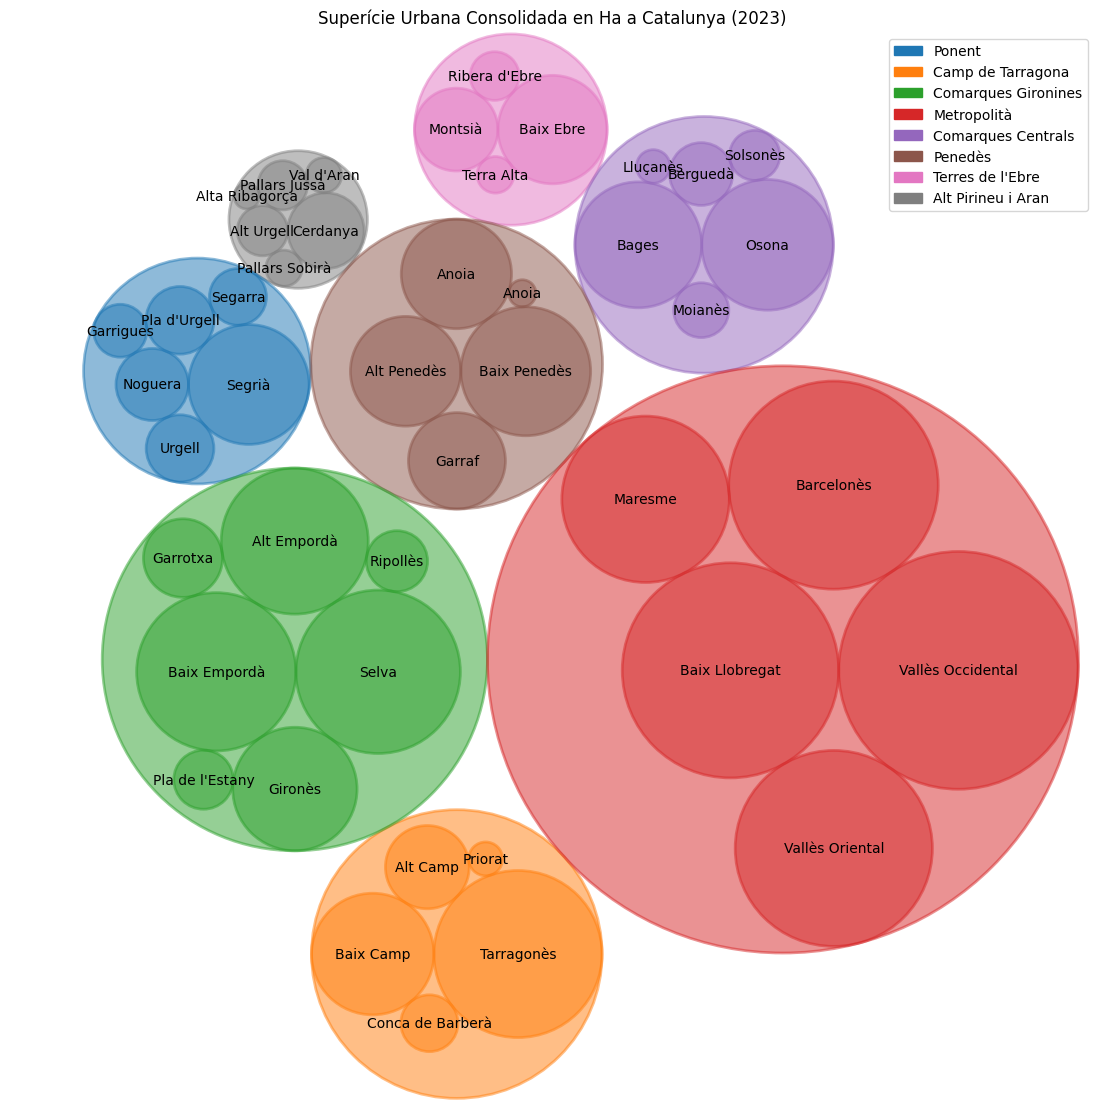

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import mplcursors

fig, ax = plt.subplots(figsize=(14, 14))
ax.set_title('Superície Urbana Consolidada en Ha a Catalunya (2023)')
ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

palette = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
palette = palette[:len([c for c in circles if c.level == 2])]

area_colors = {area: palette[i % len(palette)] for i, area in enumerate(arees)}

for circle in circles:
    if circle.level == 1:
        continue
    x, y, r = circle.x, circle.y, circle.r
    target_id = circle.ex['id']
    color = area_colors.get(target_id, None)
    is_comarca = False
    if not color:
        is_comarca = True
        parent_area = comarques.get(target_id, None)
        color = area_colors.get(parent_area, "gray") if parent_area else "gray" 
    if not is_comarca:
        ax.add_patch(plt.Circle((x, y), r, color=color, alpha=0.5, linewidth=2))

        #plt.annotate(target_id, (x, y), va='center', ha='center', 
        #             bbox=dict(facecolor=color, edgecolor='none', boxstyle='round,pad=0.5'))
    else:
        ax.add_patch(plt.Circle((x, y), r, color=color, alpha=0.5, linewidth=2))
        plt.annotate(target_id, (x, y), va='center', ha='center', 
                     bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.5'))

patches = [
    mpatches.Patch(color=color, label=area) for area, color in area_colors.items()
] 
plt.legend(handles=patches)
plt.show()

In [10]:
# Exportem
from io import BytesIO
import base64

tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = '<img src=\'data:image/png;base64,{}\'>'.format(encoded)

with open('results/bubblepacking.html','w') as f:
    f.write(html)